## **Digital Marketing Spending Optimization using Machine Learning in Python**

## **Introduction**

This project uses machine learning and data science to help a company improve how it spends money on marketing. The company sells Data Science and Data Engineering related courses and wants to know the best way to use its marketing budget.

We'll use the company's historic lead generationdata about past marketing efforts to train machine learning models. These models will predict which marketing channels are likely to bring in the most customers and revenue.

We'll explore different machine learning algorithms and compare their performance. We'll also experiment with various ways to prepare the data and choose the most important features.

The goal is to create a tool that can recommend how to divide the marketing budget among different channels like social media, SEO, email, and search ads. This should help the company get more customers and increase sales from its marketing spending.


## **Assumptions**

* We assume that <b>Interest Level</b> is our target variable which refers to the interest of a user for a lead id
* We assume that whenever the target variable is NA or Not called, the corresponding lead id is not meaningful and hence dropped
* If the model's prediction is very close to 1, it means that the user is very likely to engage with the lead id
* Columns with a lot of null values are not meaningful and imputation also won't be helpful

## **Approach**


We are treating this problem as an supervised learning problem. So every data point will have a target variable for the model to learn the dependencies and predict on the unknown.


In real life, this model would tell the business whether a user is likely to engage with the ad or not and that would in turn help the company to allocate budgets accordingly.


Given our assumptions about the data, we will build a prediction model based on the historical data. Simplifying, here's the logic of what we'll build:


1. We'll build a model to identify if a customer will be interested in the lead;
2. We'll use various tree based model and compare their performance on interest prediction;
3. We will then choose the most successful model to use in production;

* Exploratory Data Analysis (EDA):
  * Understand the features and their relationships with target variables
  * Check for missing or invalid values and their imputation


* Data Preprocessing:
  * Encode the variables using label encoding
  * Split the dataset into training and testing sets

* Model Building and Testing:
  * Random Forest
  * Light Gradient Boosting
  * Extreme Gradient Boosting


## **Install required packages**


In [ ]:
# python version 3.8.10 or up

%pip install numpy==1.20.0
%pip install pandas==1.2.4
%pip install matplotlib==3.7.1
%pip install scikit-learn==0.23.2
%pip install xgboost==1.6.2
%pip install lightgbm==3.3.2

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from IPython.display import display, HTML
# Suppress and ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# Enable multiple outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Increasing this limit allows for more columns to be visible without truncation, making it easier to view and analyze larger datasets.
pd.set_option('display.max_columns', 200)


## **Load the Data**

In [172]:
file_path = "../data/raw/marketing-leads.csv"
df = pd.read_csv(file_path)

Checking the first 10 records from the dataframe.

In [173]:
df.head(10)

,lead_id,lead_owner,interest_level,lead_created,auto_lead_location,lead_creation_source,next_activity_date,current_work,product_interest,website_source,lead_updated,marketing_source,manual_lead_location,demo_date,demo_status,closure_date
0,5e502dcf828b8975a78e89f3e9aeac12,e14c3a,Not Interested,12-01-2023 16:42,IN,API,NaN,Student,NaN,NaN,12-01-2023 19:27,NaN,India,NaN,NaN,NaN
1,efe3f074c61959c2ea1906dd0346aa69,d16267,Slightly Interested,04-12-2021 09:32,NaN,API,12-01-2022 00:00,NaN,NaN,Sales lead,12-01-2022 17:17,Paid - Instagram,India,05-12-2021 00:00,No Show,NaN
2,d26dc5cd5843622a203cf396b4ee4b1a,d138f9,No Answer,15-04-2022 10:16,NaN,API,16-04-2022 00:00,NaN,NaN,NaN,16-04-2022 20:35,Paid-Adwords,In,NaN,NaN,NaN
3,d50acaedc1e5b9c18f8ceb3c6cff345b,38e2a6,Not Interested,21-10-2022 17:02,IN,API,23-10-2022 00:00,fresher,NaN,NaN,02-12-2022 13:35,Paid-Adwords,IN,22-11-2022 00:00,Scheduled,NaN
4,07758f3d12a23e68bb3b58b8009dd9a8,d130bb,Not Interested,25-10-2021 10:48,NaN,API,NaN,NaN,NaN,Sales lead,13-11-2021 14:51,Affiliate,India,NaN,NaN,NaN
5,665eb8f7c975b055afa58b5dda3a78bc,d5b5bd,Slightly Interested,24-11-2022 22:41,NaN,API,26-11-2022 00:00,NaN,Big Data engineering,NaN,26-11-2022 19:49,NaN,TR,NaN,NaN,NaN
6,a1ea99cba3b88f6c59fea8a84f051dec,d16267,No Answer,07-07-2022 14:50,NaN,API,NaN,NaN,NaN,Sales lead,08-07-2022 18:20,Medium,India,NaN,NaN,NaN
7,e69523450132baed2dd72836cdfc9778,d130bb,Not Interested,16-09-2021 23:37,NaN,API,NaN,Glass maker at home,NaN,Sales lead,12-11-2021 04:49,Paid - Facebook,India,NaN,NaN,NaN
8,fe244887bc37b5f49311c750ce6b279f,d138f9,No Answer,08-06-2022 13:30,NaN,API,24-06-2022 00:00,NaN,NaN,NaN,24-06-2022 10:44,Paid - Instagram,In,NaN,NaN,NaN
9,3500a29dc4849a7166e98db2e44ddc53,38e2a6,No Answer,21-10-2022 23:50,IN,API,23-10-2022 00:00,NaN,NaN,NaN,23-10-2022 11:09,Paid - Instagram,NaN,NaN,NaN,NaN


## **Exploratory Data Analysis**

In [174]:
df.shape

(38984, 16)

In [178]:
df.columns

Index(['lead_id', 'lead_owner', 'interest_level', 'lead_created',
       'auto_lead_location', 'lead_creation_source', 'next_activity_date',
       'current_work', 'product_interest', 'website_source', 'lead_updated',
       'marketing_source', 'manual_lead_location', 'demo_date', 'demo_status',
       'closure_date'],
      dtype='object')

## **Data Dictionary**



| Column name	 | Description|
| ----- | ----- |
| lead_id |  Unique Identifier |
| lead_owner |  Internal sales person associated with the lead |
| interest_level |  What is lead's interest level? |
| lead_created |  Lead creation date |
| auto_lead_location |  Automatically detected location, auto detected by the system via IP address or other means |
| creation_source|  Creation source of the lead |
| next_activity_date|  Date for Next Activity |
| current_work|  Current profile of lead |
| product_interest|  Specific requirement from product |
| website_source|  Website Source of the Lead, generated by what kind of interactions or features happened on the website |
| lead_updated|  Last update time for Lead |
| marketing_source|  Marketing Source of the Lead, marketing channels or strategies that generated the lead boarding onto the website in the first place. |
| manual_lead_location |  Manually entered lead location, entered by the sales person or the lead itself. |
| demo_date|  Date for Demo |
| demo_status|  Status of demo booked with lead |
| closure_date|  Lead closing date |

In [180]:
# Interest Level is the target variable

# Check the Information of the Dataframe, number of unique values and frequency
df.describe(include='all').T

,count,unique,top,freq
lead_id,38984,37450,bcbcf737090f0a52c59237fb0ee921d5,6
lead_owner,38984,23,2f6f7f,5643
interest_level,38847,8,Slightly Interested,14572
lead_created,38984,35951,13-01-2022 14:05,17
auto_lead_location,10810,169,IN,6735
lead_creation_source,38984,3,API,36291
next_activity_date,14776,2610,31-01-2023 00:00,74
current_work,16909,6831,Student,3406
product_interest,9970,4046,DS,481
website_source,24088,10,Sales lead,23121



Lead created, Next activity date, Lead Updated time and Demo Date should be datetime datatype but it is object. We will convert them into datetime datatype.

In [189]:
df['lead_created'] = pd.to_datetime(df['lead_created'], format="%d-%m-%Y %H:%M")
df['lead_updated'] = pd.to_datetime(df['lead_updated'], format="%d-%m-%Y %H:%M")
df['next_activity_date'] = pd.to_datetime(df['next_activity_date'], format="%d-%m-%Y %H:%M")
df['demo_date'] = pd.to_datetime(df['demo_date'], format="%d-%m-%Y %H:%M")
df['closure_date'] = pd.to_datetime(df['closure_date'], format="%d-%m-%Y %H:%M")    

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   lead_id               38984 non-null  object        
 1   lead_owner            38984 non-null  object        
 2   interest_level        38847 non-null  object        
 3   lead_created          38984 non-null  datetime64[ns]
 4   auto_lead_location    10810 non-null  object        
 5   lead_creation_source  38984 non-null  object        
 6   next_activity_date    14776 non-null  datetime64[ns]
 7   current_work          16909 non-null  object        
 8   product_interest      9970 non-null   object        
 9   website_source        24088 non-null  object        
 10  lead_updated          38984 non-null  datetime64[ns]
 11  marketing_source      28339 non-null  object        
 12  manual_lead_location  34974 non-null  object        
 13  demo_date       

In [208]:
df['interest_level'].value_counts()

interest_level
Slightly Interested    14572
Not Interested         10545
No Answer               9254
Not called              1585
Fairly Interested       1320
Closed                   811
Invalid Number           636
Very Interested          124
Name: count, dtype: int64

Lets see how many different Lead Owners we have. Analyzing the importance of the 'lead_owner' feature for model building.

In [214]:
df['lead_owner'].unique()

# 1. Potential impact on lead conversion:
print("Unique lead owners:", df['lead_owner'].nunique())

# 2. Check if there's any correlation between lead_owner and interest_level
lead_owner_conversion = df.groupby('lead_owner')['interest_level'].value_counts(normalize=True).unstack()
print("\nConversion rates by lead owner:")
lead_owner_conversion

# 3. Performance metrics:
lead_owner_performance = df.groupby('lead_owner')['interest_level'].apply(lambda x: ((x == 'Very Interested') | (x == 'Fairly Interested') | (x == 'Slightly Interested')).mean())
print("\nPerformance metrics (% of 'Very Interested + Fairly Interested + Slightly Interested' leads) by lead owner:")
lead_owner_performance.sort_values(ascending=False) 

array(['e14c3a', 'd16267', 'd138f9', '38e2a6', 'd130bb', 'd5b5bd',
       '949886', 'fc348d', 'c18c01', '1eafbe', '2f6f7f', '5fe006',
       '8a10c8', '1a9b5d', 'c5837c', '64c0b2', '684149', '154755',
       'b89cfd', '8c20b0', '2c7db1', '65ed8c', '64347b'], dtype=object)

Unique lead owners: 23

Conversion rates by lead owner:


interest_level,Closed,Fairly Interested,Invalid Number,No Answer,Not Interested,Not called,Slightly Interested,Very Interested
lead_owner,,,,,,,,
154755,NaN,0.058824,0.205882,0.235294,0.147059,NaN,0.352941,NaN
1a9b5d,0.072259,0.102159,0.009967,0.151163,0.117940,0.015781,0.514120,0.016611
1eafbe,0.017413,0.017222,0.005741,0.319939,0.084768,0.037696,0.516839,0.000383
2c7db1,0.003521,NaN,NaN,0.003521,0.992958,NaN,NaN,NaN
2f6f7f,0.015243,0.028713,0.009217,0.266749,0.409607,0.032081,0.235732,0.002659
38e2a6,0.016835,0.001684,0.023569,0.353535,0.324916,0.010101,0.269360,NaN
5fe006,0.013384,0.019120,0.005736,0.284895,0.307839,0.017208,0.344168,0.007648
64347b,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64c0b2,0.009524,0.031746,0.009524,0.180952,0.387302,NaN,0.377778,0.003175



Performance metrics (% of 'Very Interested + Fairly Interested + Slightly Interested' leads) by lead owner:


lead_owner
949886    0.705882
d5b5bd    0.628254
1a9b5d    0.605964
65ed8c    0.600000
fc348d    0.548018
e14c3a    0.542773
1eafbe    0.534443
b89cfd    0.515179
684149    0.457961
8a10c8    0.422397
154755    0.411765
64c0b2    0.410095
8c20b0    0.379310
5fe006    0.369524
d130bb    0.356485
d138f9    0.275828
38e2a6    0.271044
2f6f7f    0.267057
d16267    0.182759
c18c01    0.106464
c5837c    0.083392
64347b    0.000000
2c7db1    0.000000
Name: interest_level, dtype: float64

#### Reasons to consider keeping 'lead_owner' as a feature:
1. If there's significant variation in conversion rates among lead owners. It does show that some lead owners are more effective than others.
2. If lead distribution is relatively even, reducing potential bias.
3. If there's notable difference in performance metrics among lead owners. 

However, carefully evaluate the trade-offs between potential insights and the risk of overfitting or introducing bias.

In [218]:
df['interest_level'].unique()
df['interest_level'].value_counts()

array(['Not Interested', 'Slightly Interested', 'No Answer', 'Closed',
       'Not called', 'Invalid Number', 'Fairly Interested', nan,
       'Very Interested'], dtype=object)

interest_level
Slightly Interested    14572
Not Interested         10545
No Answer               9254
Not called              1585
Fairly Interested       1320
Closed                   811
Invalid Number           636
Very Interested          124
Name: count, dtype: int64

current_work
Student                           3406
student                           1282
Fresher                            298
Working                            194
Working pro                        148
                                  ... 
JFW                                  1
BTECH last year                      1
Asst Project                         1
He is working in Sales               1
Course AIMA - Business Analyst       1
Name: count, Length: 6831, dtype: int64

current_work_category
Other                   26578
Student/Fresher          6993
Data/AI Professional     2708
Working Professional     1628
Engineer/Developer        905
Business/Management       172
Name: count, dtype: int64

Percentage distribution:
current_work_category
Other                   68.176688
Student/Fresher         17.938128
Data/AI Professional     6.946440
Working Professional     4.176072
Engineer/Developer       2.321465
Business/Management      0.441207
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='current_work_category'>

Text(0.5, 1.0, 'Distribution of Current Work Categories')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Student/Fresher'),
  Text(2, 0, 'Data/AI Professional'),
  Text(3, 0, 'Working Professional'),
  Text(4, 0, 'Engineer/Developer'),
  Text(5, 0, 'Business/Management')])

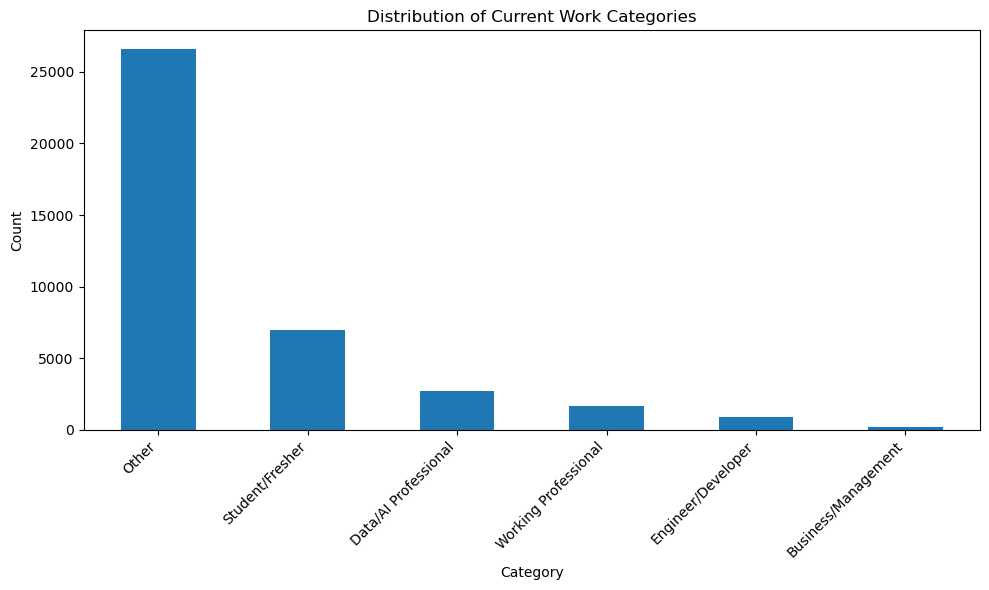

In [229]:
df['current_work'].value_counts()

# Handling the 'current_work' feature. The goal is to reduce the number of unique values in the column.

# Function to categorize current_work
def categorize_current_work(work):
    work = str(work).lower()
    if 'student' in work or 'fresher' in work or 'graduate' in work:
        return 'Student/Fresher'
    elif 'working' in work or 'employed' in work or 'professional' in work:
        return 'Working Professional'
    elif 'data' in work or 'analyst' in work or 'science' in work or 'ml' in work or 'ai' in work:
        return 'Data/AI Professional'
    elif 'engineer' in work or 'developer' in work or 'programming' in work:
        return 'Engineer/Developer'
    elif 'business' in work or 'manager' in work or 'executive' in work:
        return 'Business/Management'
    else:
        return 'Other'

# Apply the categorization
df['current_work_category'] = df['current_work'].apply(categorize_current_work)

# Display the distribution of the new categories
print(df['current_work_category'].value_counts())
print("\nPercentage distribution:")
print(df['current_work_category'].value_counts(normalize=True) * 100)

# Visualize the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['current_work_category'].value_counts().plot(kind='bar')
plt.title('Distribution of Current Work Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [233]:
df['current_work'].unique().shape
df['current_work_category'].unique().shape
## reducing the number of unique values in the column down to 6

(6832,)

(6,)

In [234]:
df['lead_creation_source'].unique()
df['lead_creation_source'].value_counts()

array(['API', 'Manually created', 'Deal'], dtype=object)

lead_creation_source
API                 36291
Manually created     2533
Deal                  160
Name: count, dtype: int64

In [235]:
df['product_interest'].unique().shape
df['product_interest'].value_counts()

(4047,)

product_interest
DS                                  481
ML                                  325
DS projects                         254
ML projects                         221
BD                                  158
                                   ... 
Better knowledge & hands exp          1
ds in shipping and logistics          1
Better Knowledge & Career Opts        1
Project for College project work      1
DL, ML                                1
Name: count, Length: 4046, dtype: int64

In [236]:
df['website_source'].unique()

array([nan, 'Sales lead', 'Start Project', 'Demo button lead',
       'Chat lead', 'Cashback lead', 'eBook',
       'Demo button lead, Chat lead', 'Sales lead, Demo button lead',
       'Sales lead, Chat lead', 'Sales lead, eBook'], dtype=object)

In [237]:
df['website_source'].value_counts()

website_source
Sales lead                      23121
Start Project                     560
Demo button lead                  267
Chat lead                         114
Cashback lead                      10
eBook                               5
Sales lead, Demo button lead        5
Sales lead, Chat lead               3
Sales lead, eBook                   2
Demo button lead, Chat lead         1
Name: count, dtype: int64

In [238]:
df['marketing_source'].value_counts()


marketing_source
SEO                                            10127
Paid - Instagram                                3895
Paid-Adwords                                    3514
Paid-YouTube                                    2652
Affiliate                                       2531
Medium                                          2215
Paid - Facebook                                 1528
Email Campaign                                  1050
Paid - Linkedin                                  154
Naukri                                           102
Medium, Paid-Adwords                              70
SEO, Medium, Paid-Adwords                         57
Referral                                          50
SEO, Affiliate                                    48
Linkedin jobs                                     46
SEO, Paid-Adwords                                 44
SEO, Paid - Instagram                             34
Affiliate, Medium                                 29
SEO, Medium                  

marketing_source_category
Paid Advertising    0.306382
Unknown             0.273061
SEO                 0.267135
Affiliate           0.065771
Medium              0.056818
Email Campaign      0.026934
Job Portal          0.002616
Other               0.001283
Name: proportion, dtype: float64


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='marketing_source_category'>

Text(0.5, 1.0, 'Distribution of Marketing Source Categories')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Paid Advertising'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'SEO'),
  Text(3, 0, 'Affiliate'),
  Text(4, 0, 'Medium'),
  Text(5, 0, 'Email Campaign'),
  Text(6, 0, 'Job Portal'),
  Text(7, 0, 'Other')])

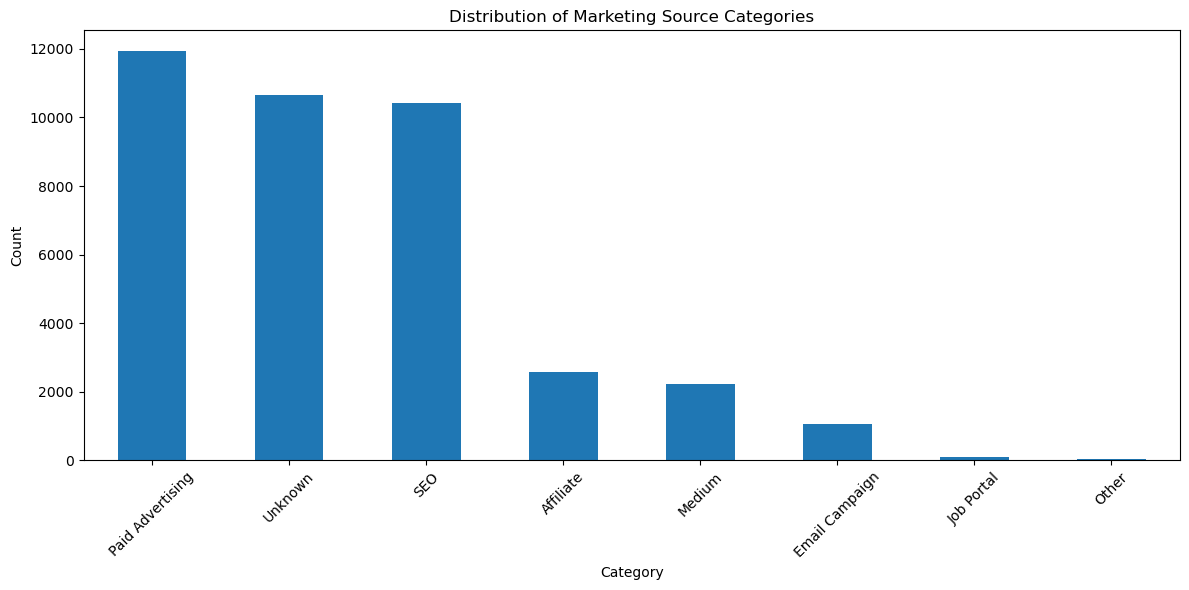

In [239]:
# For the marketing_source feature:
# 1. There are many unique values, with a long tail distribution
# 2. The top categories (SEO, Paid - Instagram, Paid-Adwords, etc.) account for most of the data
# 3. Some categories are very similar and could be grouped together
# 4. There are some multi-channel entries that we need to handle

# Let's categorize the marketing_source into broader categories
def categorize_marketing_source(source):
    if pd.isna(source):
        return 'Unknown'
    source = source.lower()
    if 'seo' in source:
        return 'SEO'
    elif any(paid in source for paid in ['paid', 'adwords', 'youtube', 'facebook', 'instagram', 'linkedin']):
        return 'Paid Advertising'
    elif 'affiliate' in source:
        return 'Affiliate'
    elif 'email' in source:
        return 'Email Campaign'
    elif 'medium' in source:
        return 'Medium'
    elif 'naukri' in source:
        return 'Job Portal'
    else:
        return 'Other'

# Apply the categorization
df['marketing_source_category'] = df['marketing_source'].apply(categorize_marketing_source)

# Display the distribution of the new categories
print(df['marketing_source_category'].value_counts(normalize=True))

# Visualize the distribution
plt.figure(figsize=(12, 6))
df['marketing_source_category'].value_counts().plot(kind='bar')
plt.title('Distribution of Marketing Source Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [240]:
df['demo_status'].value_counts()

demo_status
Scheduled    4000
Done         3956
No Show      3467
Name: count, dtype: int64

In [241]:
df['manual_lead_location'].value_counts(normalize=1)

manual_lead_location
IN                       0.403900
India                    0.322354
In                       0.059444
US                       0.046635
in                       0.018128
                           ...   
Mumbai, India.           0.000029
Hungary                  0.000029
IN\                      0.000029
ps                       0.000029
Vishakhapatnam, India    0.000029
Name: proportion, Length: 415, dtype: float64

## **Data Processing & Feature engineering**

We previously saw there are some missing values in the data. Lets have a look into that now.

In [242]:
# lead_owner
df['lead_owner'].isna().sum()

0

In [243]:
# interest_level
df['interest_level'].isna().sum()

137

* Since target variable has missing values, we will drop such rows
* It is better to drop rows where the target values are missing because the target variable is essential for training the model. 
* Missing target values mean that we do not have the correct labels for those rows, which can lead to incorrect training and evaluation of the model. 
* By dropping these rows, we ensure that the model is trained on complete and accurate data, leading to better performance and reliability.

In [247]:
df = df[df['interest_level'].notna()] ##

In [250]:
df['interest_level'].value_counts()

interest_level
Slightly Interested    14572
Not Interested         10545
No Answer               9254
Not called              1585
Fairly Interested       1320
Closed                   811
Invalid Number           636
Very Interested          124
Name: count, dtype: int64

##### Now we will handle our target variable

Since there are multiple values in target variable and we want to formulate our problem as a binary classification problem, we will do the following assignments

**Label assignment:**
* Slightly Interested = 1
* Not Interested=0
* No Answer=0
* Fairly Interested=1
* Very Interested=1

* we will drop rows where value is Not called, Closed or Invalid Number

In [251]:
# filter the DataFrame 'df' to exclude rows where the 'interest_level' column contains
#  any of the values "Not called", "Closed", or "Invalid Number".
df = df[~df['interest_level'].isin(["Not called", "Closed", "Invalid Number"])]

In [252]:
df['interest_level'].value_counts()

interest_level
Slightly Interested    14572
Not Interested         10545
No Answer               9254
Fairly Interested       1320
Very Interested          124
Name: count, dtype: int64

In [253]:
# This line of code uses the replace method to achieve the same transformation as the lambda function.
# It replaces the values "Slightly Interested", "Fairly Interested", and "Very Interested" with 1,
# and the values "Not Interested" and "No Answer" with 0.
# This also converts the 'interest_level' into a binary classification problem.
# df['interest_level'] = df['interest_level'].replace({
#     "Slightly Interested": 1,
#     "Fairly Interested": 1,
#     "Very Interested": 1,
#     "Not Interested": 0,
#     "No Answer": 0
# })

df['interest_level'] = df['interest_level'].apply(lambda x: 1 if x in ["Slightly Interested", "Fairly Interested", "Very Interested"] else 0)

In [254]:
df['interest_level'].value_counts()
# That shows a good distribution of target variable.

interest_level
0    19799
1    16016
Name: count, dtype: int64

#### Drop not imporant columns

In [263]:
df.columns

Index(['lead_id', 'lead_owner', 'interest_level', 'lead_created',
       'auto_lead_location', 'lead_creation_source', 'next_activity_date',
       'current_work', 'product_interest', 'website_source', 'lead_updated',
       'marketing_source', 'manual_lead_location', 'demo_date', 'demo_status',
       'closure_date', 'current_work_category', 'marketing_source_category'],
      dtype='object')

In [259]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

def evaluate_feature_importance(df, target_column):
    """
    This function evaluates the importance of features using RandomForestClassifier.
    It also checks if RandomForestClassifier needs all features to be numerical values.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    target_column (str): The name of the target column.
    
    Returns:
    pd.DataFrame: A DataFrame containing feature importances.
    float: The accuracy of the RandomForestClassifier on the test set.
    """
    # Prepare the data
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Convert categorical features to numerical values using LabelEncoder
    label_encoders = {}
    for column in X.select_dtypes(include=['object', 'datetime64[ns]']).columns:
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Get feature importances
    feature_importances = clf.feature_importances_

    # Create a DataFrame for feature importances
    importances_df = pd.DataFrame({
        "Feature": X.columns,
        "Importance": feature_importances
    })

    # Sort the DataFrame by importance
    importances_df = importances_df.sort_values(by="Importance", ascending=False)

    return importances_df, accuracy

# Example usage
df_test = df.copy()
importances_df, accuracy = evaluate_feature_importance(df_test, "interest_level")
print(f"Accuracy: {accuracy}")
print(importances_df)

Accuracy: 0.8563451067988274
                      Feature  Importance
13                demo_status    0.124582
12                  demo_date    0.121398
9                lead_updated    0.110783
2                lead_created    0.109847
0                     lead_id    0.088743
1                  lead_owner    0.081086
5          next_activity_date    0.075399
7            product_interest    0.069035
6                current_work    0.068291
10           marketing_source    0.034149
11       manual_lead_location    0.033485
16  marketing_source_category    0.023018
15      current_work_category    0.022026
3          auto_lead_location    0.021599
8              website_source    0.012716
4        lead_creation_source    0.003597
14               closure_date    0.000246


In [275]:
## let's remove demo_date.
## product_interest has too many missing values and it will be noisy if we do an imputation here.
## closure_date has too many missing values and it will be noisy if we do an imputation here, also the correlation with target variable is weak.
df = df.drop(["lead_id", "auto_lead_location", "next_activity_date", "product_interest",
              "lead_updated", "manual_lead_location", "demo_date", "closure_date"], axis=1)

In [ ]:
df = df.drop(["current_work", "marketing_source"], axis=1)
df.rename(columns={"current_work_category": "current_work", 
                   "marketing_source_category": "marketing_source"}, inplace=True)
df.info()

In [ ]:
df = df.drop(["website_source", "demo_status"], axis=1)

#### Lead creation time

In [285]:
# Create day_of_week feature to capture potential patterns in lead creation across different days
# This can help identify if certain days of the week are more likely to generate leads
# 0 represents Monday, 1 for Tuesday, and so on up to 6 for Sunday
df['hour_of_day'] = df['lead_created'].dt.hour
df['day_of_week'] = df['lead_created'].dt.weekday
df = df.drop(["lead_created"], axis=1)

#### Lead Creation source

In [289]:
df['lead_creation_source'].value_counts()
df['marketing_source'].value_counts()

lead_creation_source
API                 33317
Manually created     2346
Deal                  152
Name: count, dtype: int64

marketing_source
Paid Advertising    11125
SEO                  9995
Unknown              9456
Affiliate            2244
Medium               2045
Email Campaign        813
Job Portal             99
Other                  38
Name: count, dtype: int64

In [290]:
from pandas import factorize
labels, categories = factorize(df["lead_creation_source"])
labels.shape
categories.shape


(35815,)

(3,)

In [291]:
# Assign the numeric labels obtained from factorizing the 'Creation Source' column to a new column 'labels' in the dataframe.
df["labels"] = labels

# Calculate the absolute value of the correlation between the 'Interest Level' column and the newly created 'labels' column.
abs(df["interest_level"].corr(df["labels"]))

0.008490292073158514

There is a positive correlation with the target variable

In [292]:
df = df.drop(["labels"], axis=1)

### Label Encoding

In [295]:
label_encoder1 = preprocessing.LabelEncoder()
df['marketing_source']= label_encoder1.fit_transform(df['marketing_source'])

In [297]:
label_encoder2 = preprocessing.LabelEncoder()
df['lead_owner']= label_encoder2.fit_transform(df['lead_owner'])

In [299]:
label_encoder3 = preprocessing.LabelEncoder()
df['lead_creation_source']= label_encoder3.fit_transform(df['lead_creation_source'])

In [301]:
label_encoder4 = preprocessing.LabelEncoder()
df['current_work']= label_encoder4.fit_transform(df['current_work'])

In [302]:
df.head()

,lead_owner,interest_level,lead_creation_source,current_work,marketing_source,hour_of_day,day_of_week
0,20,0,0,4,7,16,3
1,18,1,0,3,5,9,5
2,17,0,0,3,5,10,4
3,5,0,0,4,5,17,4
4,16,0,0,3,0,10,0


We transformed 4 columns using label encoding

Remember one thing, you should always use the same label encoding variable for test dataset. Since here we are handling train/test together, we are not worrying about it

## **Model Building and Testing**

In [303]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve 
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

Identify the right features for the model

In [304]:
y = df["interest_level"]
X = df.drop(["interest_level"], axis=1)

**Splitting the dataset into a training and production dataset:**

- Training: Part of data used for training our supervised models
- Test: Part of the dataset used for testing our models performance

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,lead_owner,lead_creation_source,current_work,marketing_source,hour_of_day,day_of_week
2201,19,0,4,7,4,2
29205,4,0,4,6,19,2
24325,18,0,5,3,3,1
20499,1,0,3,7,16,1
34645,17,0,1,6,12,0


We finally have prepared model ready data.

Lets do the fun part: model building now.

In [ ]:
# The following code initializes three different classifiers: RandomForestClassifier, XGBClassifier, and LGBMClassifier.
# RandomForestClassifier is set with 300 estimators.
# XGBClassifier is set with 300 estimators, a binary logistic objective, histogram-based tree method, learning rate (eta) of 0.1, and a maximum depth of 3.
# LGBMClassifier is set with 300 estimators.
rf = RandomForestClassifier(n_estimators=300)
xgb = XGBClassifier(n_estimators=300, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3)
lgb = LGBMClassifier(n_estimators=300)

# rf = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt')
# xgb = XGBClassifier(n_estimators=300, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, subsample=0.8, colsample_bytree=0.8)
# lgb = LGBMClassifier(n_estimators=300, learning_rate=0.05, num_leaves=31, max_depth=-1, min_child_samples=20, subsample=0.8, colsample_bytree=0.8)

# Define parameter grids for each model

# Random Forest parameters
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# XGBoost parameters
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# LightGBM parameters
lgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform RandomizedSearchCV for each model
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
lgb_random = RandomizedSearchCV(estimator=lgb, param_distributions=lgb_param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
rf_random.fit(X_train, y_train)
xgb_random.fit(X_train, y_train)
lgb_random.fit(X_train, y_train)

# Get best parameters and models
rf_best = rf_random.best_estimator_
xgb_best = xgb_random.best_estimator_
lgb_best = lgb_random.best_estimator_

print("Best parameters for Random Forest:", rf_random.best_params_)
print("Best parameters for XGBoost:", xgb_random.best_params_)
print("Best parameters for LightGBM:", lgb_random.best_params_)

# Train models with best parameters
rf_best.fit(X_train, y_train)
xgb_best.fit(X_train, y_train)
lgb_best.fit(X_train, y_train)

# Evaluate models
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return accuracy, f1, precision, recall

print("\nRandom Forest Evaluation:")
rf_scores = evaluate_model(rf_best, X_test, y_test)
print(f"Accuracy: {rf_scores[0]:.4f}, F1: {rf_scores[1]:.4f}, Precision: {rf_scores[2]:.4f}, Recall: {rf_scores[3]:.4f}")

print("\nXGBoost Evaluation:")
xgb_scores = evaluate_model(xgb_best, X_test, y_test)
print(f"Accuracy: {xgb_scores[0]:.4f}, F1: {xgb_scores[1]:.4f}, Precision: {xgb_scores[2]:.4f}, Recall: {xgb_scores[3]:.4f}")

print("\nLightGBM Evaluation:")
lgb_scores = evaluate_model(lgb_best, X_test, y_test)
print(f"Accuracy: {lgb_scores[0]:.4f}, F1: {lgb_scores[1]:.4f}, Precision: {lgb_scores[2]:.4f}, Recall: {lgb_scores[3]:.4f}")


#### Training multiple models together

In [ ]:
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)

All models are trained very qucikly here.

Scitkit-learn provides an additional parameter n_jobs=-1 which parallelize some of the models using cpu threads

# Model Evaluation

In [313]:
def get_evaluation_metrics(model_name, model, pred, actual):
    print("Accuracy of %s: " % model_name, accuracy_score(pred, actual))

In [314]:
get_evaluation_metrics("Random Forest", rf, rf.predict(X_test), y_test)
get_evaluation_metrics("XGBoost", xgb, xgb.predict(X_test), y_test)
get_evaluation_metrics("Light GBM", lgb, lgb.predict(X_test), y_test)

Accuracy of Random Forest:  0.707943599050677
Accuracy of XGBoost:  0.7445204523244451
Accuracy of Light GBM:  0.7435432081530086


In [316]:
## Hyperparameter tuned models only slighly better than the previous models without hyperparameter tuning
get_evaluation_metrics("Random Forest", rf_best, rf_best.predict(X_test), y_test)
get_evaluation_metrics("XGBoost", xgb_best, xgb_best.predict(X_test), y_test)
get_evaluation_metrics("Light GBM", lgb_best, lgb_best.predict(X_test), y_test)

Accuracy of Random Forest:  0.743822420773419
Accuracy of XGBoost:  0.7470333659081391
Accuracy of Light GBM:  0.7499650984224487


Text(0.5, 1.0, 'Precision-Recall Curve for Random Forest')

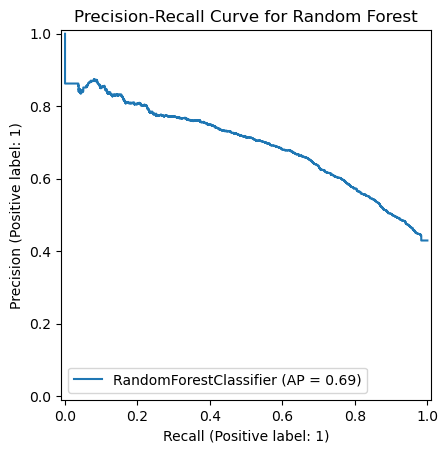

Text(0.5, 1.0, 'ROC Curve for Random Forest')

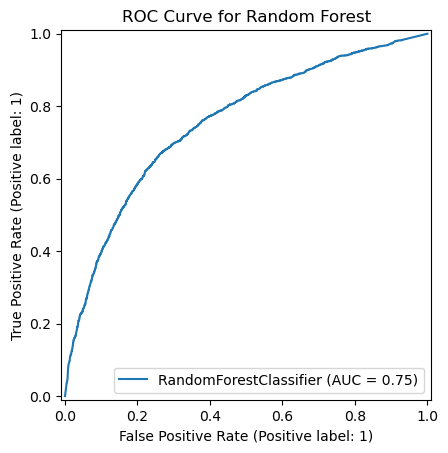

In [311]:
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test)
plt.title("Precision-Recall Curve for Random Forest")   
plt.show()

RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve for Random Forest")
plt.show()

Text(0.5, 1.0, 'Precision-Recall Curve for LightGBM')

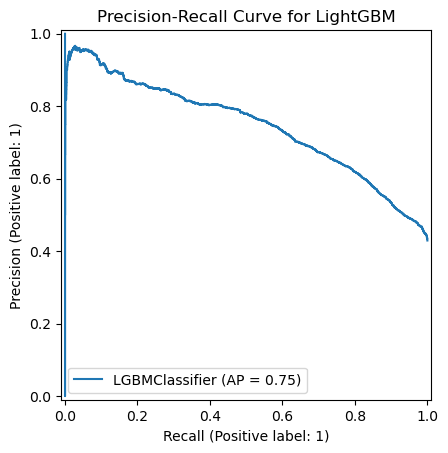

Text(0.5, 1.0, 'ROC Curve for LightGBM')

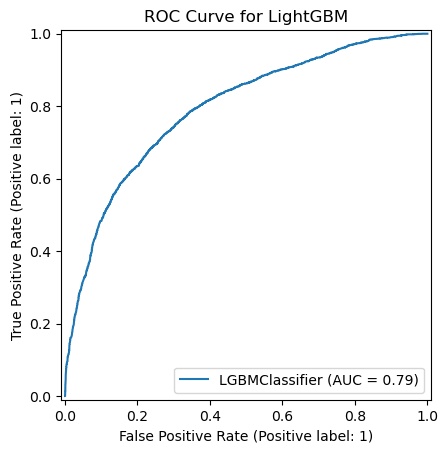

In [133]:
PrecisionRecallDisplay.from_estimator(lgb, X_test, y_test)
plt.title("Precision-Recall Curve for LightGBM")    
plt.show()

RocCurveDisplay.from_estimator(lgb, X_test, y_test)
plt.title("ROC Curve for LightGBM")
plt.show()

Text(0.5, 1.0, 'Precision-Recall Curve for XGBoost')

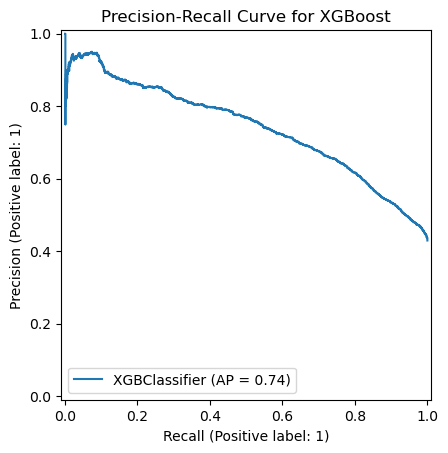

Text(0.5, 1.0, 'ROC Curve for XGBoost')

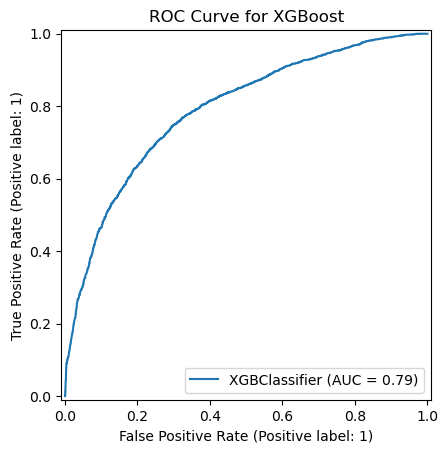

In [134]:
PrecisionRecallDisplay.from_estimator(xgb, X_test, y_test)
plt.title("Precision-Recall Curve for XGBoost") 
plt.show()

RocCurveDisplay.from_estimator(xgb, X_test, y_test)
plt.title("ROC Curve for XGBoost")
plt.show()


#### Possible Reasons of limited improvement from Random Search Hyperparameter Tuning

1. Model Complexity vs. Data Complexity:
   - If the underlying patterns in the data are relatively simple, a more complex model may not necessarily perform better. The default hyperparameters might already be sufficient to capture the important features of the data.

2. Limited Search Space:
   - The range of hyperparameters explored in the random search might not have been wide enough or diverse enough to find significantly better configurations.

3. Data Quality and Quantity:
   - If the dataset is noisy, imbalanced, or limited in size, even optimized hyperparameters may not lead to substantial improvements.

4. Feature Engineering:
   - The quality and relevance of the features might be more important than fine-tuning hyperparameters. Better feature selection or engineering could potentially yield more significant improvements.

5. Model Selection:
   - The chosen models (Random Forest, XGBoost, LightGBM) might already be well-suited for this particular problem, leaving less room for improvement through hyperparameter tuning.

6. Overfitting to Validation Set:
   - The hyperparameter tuning process might have led to slight overfitting to the validation set, which doesn't translate to significant improvements on the test set.

7. Diminishing Returns:
   - There might be a point of diminishing returns where further tuning yields only marginal improvements.

To potentially improve results:
- Expand the hyperparameter search space
- Focus on feature engineering and selection
- Collect more data or address data quality issues
- Experiment with different model architectures or ensemble methods


#### Predicting the interest level of new leads

In [322]:
# Generate two test entries
test_entries = pd.DataFrame({
    'lead_owner': ['d16267', 'e14c3a'],
    'lead_creation_source': ['API', 'Manually created'],
    'current_work': ['Student/Fresher', 'Business/Management'],
    'marketing_source': ['Paid Advertising', 'SEO'],
    'hour_of_day': [10, 15],
    'day_of_week': [2, 4]
})

# Encode the test entries
test_entries_encoded = test_entries.copy()
test_entries_encoded['marketing_source'] = label_encoder1.transform(test_entries_encoded['marketing_source'])
test_entries_encoded['lead_owner'] = label_encoder2.transform(test_entries_encoded['lead_owner'])
test_entries_encoded['lead_creation_source'] = label_encoder3.transform(test_entries_encoded['lead_creation_source'])
test_entries_encoded['current_work'] = label_encoder4.transform(test_entries_encoded['current_work'])
#test_entries_encoded['current_work'].apply(lambda x: 1 if 'student' in str(x).strip().lower() else 0)


# Predict using the trained models
rf_predictions = rf.predict(test_entries_encoded)
xgb_predictions = xgb.predict(test_entries_encoded)
lgb_predictions = lgb.predict(test_entries_encoded)

# Evaluate the predictions
print("Random Forest Predictions:", rf_predictions)
print("XGBoost Predictions:", xgb_predictions)
print("LightGBM Predictions:", lgb_predictions)

Random Forest Predictions: [0 1]
XGBoost Predictions: [0 1]
LightGBM Predictions: [0 1]


## **Conclusion**

In this project we used a bunch of supervised models to predict if the customer would be interested in a lead.

After looking at the PR and ROC curves above, we can conclude that <b>LightGBM</b> is giving us a little best possible results.

## **Extending the project**

To demostrate to optimize the budget allocation, we need to analyze the performance of each marketing source in terms of lead conversion rates and cost-effectiveness. 

This can be achieved by calculating the return on investment (ROI) for each marketing source and then allocating the budget accordingly.

In [325]:
# Step 1: Calculate the conversion rate for each marketing source
conversion_rates = df.groupby('marketing_source')['interest_level'].apply(lambda x: (x == 1).sum() / len(x))

# Step 2: Calculate the cost per lead for each marketing source (assuming we have a cost data frame, for demonstration purposes only)
cost_df = pd.DataFrame({
    'marketing_source': ['SEO', 'Paid Advertising', 'Medium', 'Affiliate', 'Email Campaign', 'Job Portal', 'Other', 'Unknown'],
    'cost_per_lead': [10, 15, 20, 25, 5, 8, 12, 7]
})

# Step 3: Calculate the ROI for each marketing source
#roi_df = pd.merge(conversion_rates.reset_index(), cost_df, on='marketing_source')
roi_df = pd.concat([conversion_rates.reset_index(), cost_df], axis=1).loc[:, ~pd.concat([conversion_rates.reset_index(), cost_df], axis=1).columns.duplicated()]
roi_df = roi_df.dropna()

roi_df['ROI'] = roi_df['interest_level'] / roi_df['cost_per_lead']

# Step 4: Allocate the budget based on ROI
total_budget = 100000  # Example total budget, ficticious number only
roi_df['budget_allocation'] = (roi_df['ROI'] / roi_df['ROI'].sum()) * total_budget

# Step 5: Display the budget allocation
print(roi_df[['marketing_source', 'budget_allocation']])
roi_df

   marketing_source  budget_allocation
0                 0        6998.108094
1                 1        4585.633490
2                 2        5879.224533
3                 3        1977.814088
4                 4       42046.466471
5                 5        8860.803504
6                 6       10617.135931
7                 7       19034.813890


,marketing_source,interest_level,cost_per_lead,ROI,budget_allocation
0,0,0.306595,10,0.030660,6998.108094
1,1,0.301353,15,0.020090,4585.633490
2,2,0.515152,20,0.025758,5879.224533
3,3,0.216626,25,0.008665,1977.814088
4,4,0.921053,5,0.184211,42046.466471
5,5,0.310562,8,0.038820,8860.803504
6,6,0.558179,12,0.046515,10617.135931
7,7,0.583756,7,0.083394,19034.813890


In [327]:
# Analyze and interpret the ROI results
print("ROI Analysis:")
print("--------------")

# Sort the ROI dataframe by ROI in descending order
roi_sorted = roi_df.sort_values('ROI', ascending=False)

print("1. Most effective marketing sources:")
for idx, row in roi_sorted.head(3).iterrows():
    print(f"   - {row['marketing_source']}: ROI = {row['ROI']:.4f}")

print("\n2. Least effective marketing sources:")
for idx, row in roi_sorted.tail(3).iterrows():
    print(f"   - {row['marketing_source']}: ROI = {row['ROI']:.4f}")

ROI Analysis:
--------------
1. Most effective marketing sources:
   - 4.0: ROI = 0.1842
   - 7.0: ROI = 0.0834
   - 6.0: ROI = 0.0465

2. Least effective marketing sources:
   - 2.0: ROI = 0.0258
   - 1.0: ROI = 0.0201
   - 3.0: ROI = 0.0087
